<a href="https://colab.research.google.com/github/nalrob/Datos_Masivos_MCD/blob/main/Practica2_API_Gobmex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import plotly.graph_objs as go
from plotly.offline import iplot
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/condiciones-atmosfericas.csv')
df.head()

,_id,cityid,validdateutc,winddirectioncardinal,probabilityofprecip,relativehumidity,name,date-insert,longitude,state,lastreporttime,skydescriptionlong,stateabbr,tempc,latitude,iconcode,windspeedkm
0,5952983359954a0adbf7ab09,MXAS0002,20170627T140000Z,SSE,40,90,Aguascalientes,2017-06-27T17:36:43.084Z,-102.2960,Aguascalientes,20170627T092449Z,Tormentas dispersas,AGU,17,21.87982,96,6
1,5952983359954a0adbf7ab0a,MXAS0170,20170627T140000Z,S,60,91,Asientos,2017-06-27T17:36:43.088Z,-102.0893,Aguascalientes,20170627T092453Z,Tormentas dispersas,AGU,15,22.23832,96,5
2,5952983359954a0adbf7ab0b,MXAS0171,20170627T140000Z,E,60,84,Calvillo,2017-06-27T17:36:43.088Z,-102.7188,Aguascalientes,20170627T092453Z,Tormentas dispersas,AGU,19,21.84691,96,2
3,5952983359954a0adbf7ab0c,MXAS0172,20170627T140000Z,S,50,83,Cosío,2017-06-27T17:36:43.088Z,-102.3000,Aguascalientes,20170627T092453Z,Tormentas dispersas,AGU,17,22.36641,96,3
4,5952983359954a0adbf7ab0d,MXAS0173,20170627T140000Z,SSO,50,84,El Llano,2017-06-27T17:36:43.089Z,-101.9653,Aguascalientes,20170627T092453Z,Tormentas dispersas,AGU,17,21.91887,96,3


De la página oficial del gobierno de México se extrae una base de datos que muestra las condiciones ambientables de algunos estados de la republica.


In [ ]:
df_sel = df[['name', 'state','date-insert', 'longitude', 'winddirectioncardinal','probabilityofprecip','tempc','iconcode' ,'windspeedkm', 'skydescriptionlong']]
df_sel

,name,state,date-insert,longitude,winddirectioncardinal,probabilityofprecip,tempc,iconcode,windspeedkm,skydescriptionlong
0,Aguascalientes,Aguascalientes,2017-06-27T17:36:43.084Z,-102.2960,SSE,40,17,96,6,Tormentas dispersas
1,Asientos,Aguascalientes,2017-06-27T17:36:43.088Z,-102.0893,S,60,15,96,5,Tormentas dispersas
2,Calvillo,Aguascalientes,2017-06-27T17:36:43.088Z,-102.7188,E,60,19,96,2,Tormentas dispersas
3,Cosío,Aguascalientes,2017-06-27T17:36:43.088Z,-102.3000,S,50,17,96,3,Tormentas dispersas
4,El Llano,Aguascalientes,2017-06-27T17:36:43.089Z,-101.9653,SSO,50,17,96,3,Tormentas dispersas
...,...,...,...,...,...,...,...,...,...,...
95,Candelaria,Campeche,2017-06-27T17:36:43.107Z,-91.0463,ESE,0,27,66,11,Parcialmente nublado
96,Acuña,Coahuila,2017-06-27T17:36:43.108Z,-100.9783,E,20,26,69,11,Mayormente nublado
97,Monclova,Coahuila,2017-06-27T17:36:43.108Z,-101.4172,NNO,20,26,66,10,Parcialmente nublado
98,Piedras Negras,Coahuila,2017-06-27T17:36:43.108Z,-100.5284,ENE,20,26,69,8,Mayormente nublado


In [ ]:
df_sorted = df_sel.sort_values(by='longitude', ascending=False)
df_sorted

,name,state,date-insert,longitude,winddirectioncardinal,probabilityofprecip,tempc,iconcode,windspeedkm,skydescriptionlong
91,Hopelchén,Campeche,2017-06-27T17:36:43.106Z,-89.84505,ESE,0,27,66,11,Parcialmente nublado
88,Calkiní,Campeche,2017-06-27T17:36:43.106Z,-90.05074,ESE,0,28,66,16,Parcialmente nublado
90,Hecelchakán,Campeche,2017-06-27T17:36:43.106Z,-90.13451,ESE,0,28,66,16,Parcialmente nublado
93,Tenabo,Campeche,2017-06-27T17:36:43.106Z,-90.22576,ESE,0,28,66,13,Parcialmente nublado
86,Campeche,Campeche,2017-06-27T17:36:43.105Z,-90.53965,ESE,0,27,66,13,Parcialmente nublado
...,...,...,...,...,...,...,...,...,...,...
19,Mulegé,Baja California Sur,2017-06-27T17:36:43.093Z,-112.26830,OSO,10,27,66,8,Parcialmente nublado
12,Mexicali,Baja California,2017-06-27T17:36:43.092Z,-115.47560,ONO,0,32,85,3,Soleado
11,Ensenada,Baja California,2017-06-27T17:36:43.091Z,-116.59510,NNE,0,22,85,3,Soleado
14,Tecate,Baja California,2017-06-27T17:36:43.092Z,-116.62650,ENE,0,23,85,3,Soleado


In [ ]:
corr_matrix = df_sorted.corr(method='pearson')
corr_matrix

<ipython-input-46-5df4d11fa5ac>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,longitude,probabilityofprecip,tempc,iconcode,windspeedkm
longitude,1.000000,0.180968,0.201097,-0.285755,0.630185
probabilityofprecip,0.180968,1.000000,-0.495661,0.374299,-0.066192
tempc,0.201097,-0.495661,1.000000,-0.279219,0.357291
iconcode,-0.285755,0.374299,-0.279219,1.000000,-0.308035
windspeedkm,0.630185,-0.066192,0.357291,-0.308035,1.000000


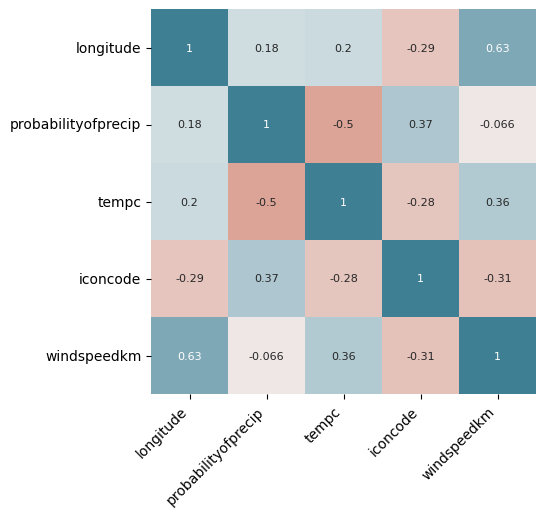

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

La variable que más se relaciona con la localización geografica (longitud) es la velocidad del viento en kms (windspeedkm). 


Además es evidente que hay una correlación negativa muy signfiicativa entre la probabilidad de precipitación (probabilityofprecip) y la velocidad del viento en kms (windspeedkm) y la temperatura del lugar (tempc).

# Agrupamiento de estados para analizar la latitud

In [ ]:
grouped_data = df.groupby('state')['longitude'].mean()

state = []
longitude = []

for group_name, group_data in grouped_data.items():
    state.append(group_name)
    longitude.append(group_data)

# Ordenar los datos por latitud de mayor a menor
state, longitude = zip(*sorted(zip(state, longitude), key=lambda x: x[1], reverse=True))

fig = go.Figure(data=go.Bar(y=state, x=longitude, orientation='h'))
fig.update_layout(xaxis_title='Longitud', yaxis_title='Estado', title='Longitud por estado', showlegend=False)
iplot(fig)


Se mostro la información con unas barras agrupadas, pero en mi opinión, la información es más viable de mostrar en un mapa.

Como conclusión, este es el orden de los estados de menor a mayor latitud:
1-. Baja California, 2-.Baja California Sur, 3-.Chihuahua, 4-. Aguascalientes, 5-. Coahuila y 6-. Campeche.


Esta información es una referencia previa a los análisis que se harán a continuación ya que se analizara la influencia de ciertas variables con respecto a su longitud.

# Analisis del comportamiento de la probabilidad de precipitación 


In [ ]:
grouped_data = df_sorted.groupby('state')

boxes = []

for group_name, group_data in grouped_data:
    box = go.Box(
        y=group_data.probabilityofprecip,
        name=group_name,
        marker=dict(color='rgb(12, 12, 140)'),
    )
    boxes.append(box)


fig = go.Figure(data=boxes)
fig.update_layout(title='Boxplot of Probability of precipitation')
iplot(fig)

In [109]:
trace1 = go.Scatter(
                    y = df_sorted.probabilityofprecip,
                    x = df_sorted.longitude,
                    mode = "lines",
                    name = "Probability of precipitation",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'))

data = [trace1]
layout = dict(title = 'Tendency chart for probability of precipitacion by longitude',
              xaxis= dict(title= 'longitude',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

Podemos concluir que a en un rango de longitud de entre -105 y -100 la probabilidad de precipitación es mucho mayor.

# Analisis del comportamiento de la temperatura

In [ ]:
grouped_data = df_sorted.groupby('state')

boxes = []

for group_name, group_data in grouped_data:
    box = go.Box(
        y=group_data.tempc,
        name=group_name,
        marker=dict(color='rgb(12, 12, 140)'),
    )
    boxes.append(box)


fig = go.Figure(data=boxes)
fig.update_layout(title='Boxplot of Temperature by state')
iplot(fig)

In [110]:
trace1 = go.Scatter(
                    y = df_sorted.tempc,
                    x = df_sorted.longitude,
                    mode = "lines",
                    name = "Temperature",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'))

data = [trace1]
layout = dict(title = 'Tendency chart of temperature by longitude',
              xaxis= dict(title= 'longitude',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

Podemos observar una fuerte inestabilidad de la temperatura en las ciudades donde la longitud esta entre -108 y -105.

Por otro lado y de manera totalmente adversa, las ciudades con una longitud de entre -100 y -98 tienen una temperatura muy estable y se encuentra entre 25 y 30 grados centigrados, un clima caluroso y muy agradable. Los estados que estan en este rango de longitud son Coahuila y Campeche, esto se referencia a lo observado en el Boxplot, estos estados tienen las cajas más chicas, por lo que muestran tener menor variación.

# Analisis del comportamiento de la velocidad del viento 

In [ ]:
grouped_data = df_sorted.groupby('state')

boxes = []

for group_name, group_data in grouped_data:
    box = go.Box(
        y=group_data.windspeedkm,
        name=group_name,
        marker=dict(color='rgb(12, 12, 140)'),
    )
    boxes.append(box)



fig = go.Figure(data=boxes)
fig.update_layout(title='Boxplot of Windspeed by state')
iplot(fig)

In [111]:
trace1 = go.Scatter(
                    y = df_sorted.windspeedkm,
                    x = df_sorted.longitude,
                    mode = "lines",
                    name = "Temperature",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'))

data = [trace1]
layout = dict(title = 'Tendency chart of Windspeed by longitude',
              xaxis= dict(title= 'longitude',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

En el grafico de correlación observamos que windspeed o velocidad del viendo se relaciona fuertemente con la longitud y tambien vimos que tiene una fuerte correlación negativa con la precipitación. En el gráfico lineal de tendencia si se puede observar como la variable windspeed va a la alta conforme se incrementa la longitud. No es muy claro lo mencionado previamente, debido a que la tendencia no es completamente lineal, hay inestabilidad en ciertos puntos.


Esta variable se comporta de manera muy similar a la temperatura, se inestabiliza fuertemente en las ciudades que estan en una longitude de entre -108 y -105. Las ciudades de chihuahua estan en ese rango, no se ve tan visual esto en el boxplot, quiza esto este influido por las variables atipicas.


Por el contrario, las ciudades con longitud de entre -101 y -93, el incremento de la variable windspeed se ve bastante lineal.

# Grupos y dispersión en un plano 3D

In [105]:
trace1 = go.Scatter3d(
    x=df_sorted.windspeedkm,
    y=df_sorted.tempc,
    z=df_sorted.probabilityofprecip,
    mode='markers',
    marker=dict(
        size=10,
        color='rgb(255,0,0)',                
    )
)

data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    )
    
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

# Recursos


Gobierno de México: https://datos.gob.mx/blog/api-datosgobmx 